# Team Assignment 3
# HE 381

## Team Members  
1. Abhijeet Bhatta (25169)
2. Ankush Kumar (24033)
3. Chanyanka Kakati (27228) 
4. Suman Dafadar (24139)


## Question 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#### Defining free ($H_{\text{free}}$) and anharmonic ($H_{\text{anh}}$) Hamiltonians

In [2]:
def hamiltonian(xmax: float = 3.0, nq: int = 3, lam: float = 0.0) -> np.ndarray:
    L = 2 * xmax
    N = 2 ** nq
    dx = 2 * xmax / N

    j = np.arange(N)
    
    x = -xmax + j * dx
    pos_term = 0.5 * np.diag(x ** 2)

    lambda_term = lam * 0.25 * np.diag(x ** 4)

    p = 2 * np.pi / L * (j - N/2)
    mom_term_mom_basis = 0.5 * np.diag(p ** 2)

    F = (1 / np.sqrt(N)) * np.exp(1j * np.outer(p, x))
    mom_term = F.conj().T @ mom_term_mom_basis @ F

    H = mom_term + pos_term + lambda_term
    return H

#### Finding eigenenergies and eigenfunctions using exact diagonalization

In [3]:
def energies_and_wavefunctions(H: np.ndarray) -> tuple:
    val, vec = np.linalg.eigh(H)
    first_5_vals = val[:5]
    first_5_vecs = vec[:, :5]

    return first_5_vals, first_5_vecs

### Calculating and storing the lowest $5$ energies and wavefunctions for both $H_{\text{free}}$ and $H_{\text{anh}}$ Hamiltonians

In [4]:
xmax_vals = np.arange(3, 8)
nq_vals = np.arange(3, 8)

all_energies_free = np.empty((len(xmax_vals), len(nq_vals)), dtype=object)
all_wavefunctions_free = np.empty((len(xmax_vals), len(nq_vals)), dtype=object)

all_energies_anh = np.empty((len(xmax_vals), len(nq_vals)), dtype=object)
all_wavefunctions_anh = np.empty((len(xmax_vals), len(nq_vals)), dtype=object)

for i in range(len(xmax_vals)):
    for j in range(len(nq_vals)):
        H_free = hamiltonian(xmax=xmax_vals[i], nq=nq_vals[j], lam=0.0)
        H_anh = hamiltonian(xmax=xmax_vals[i], nq=nq_vals[j], lam=1.0)

        energies_free, wavefunctions_free = energies_and_wavefunctions(H_free)
        all_energies_free[i, j] = energies_free
        all_wavefunctions_free[i, j] = wavefunctions_free
        
        energies_anh, wavefunctions_anh = energies_and_wavefunctions(H_anh)
        all_energies_anh[i, j] = energies_anh
        all_wavefunctions_anh[i, j] = wavefunctions_anh

## Task 1: Energy Convergence

#### Plotting the lowest $5$ energies of $H_{\text{free}}$ Hamiltonian for various $x_{\text{max}}$ and $n_q$ values

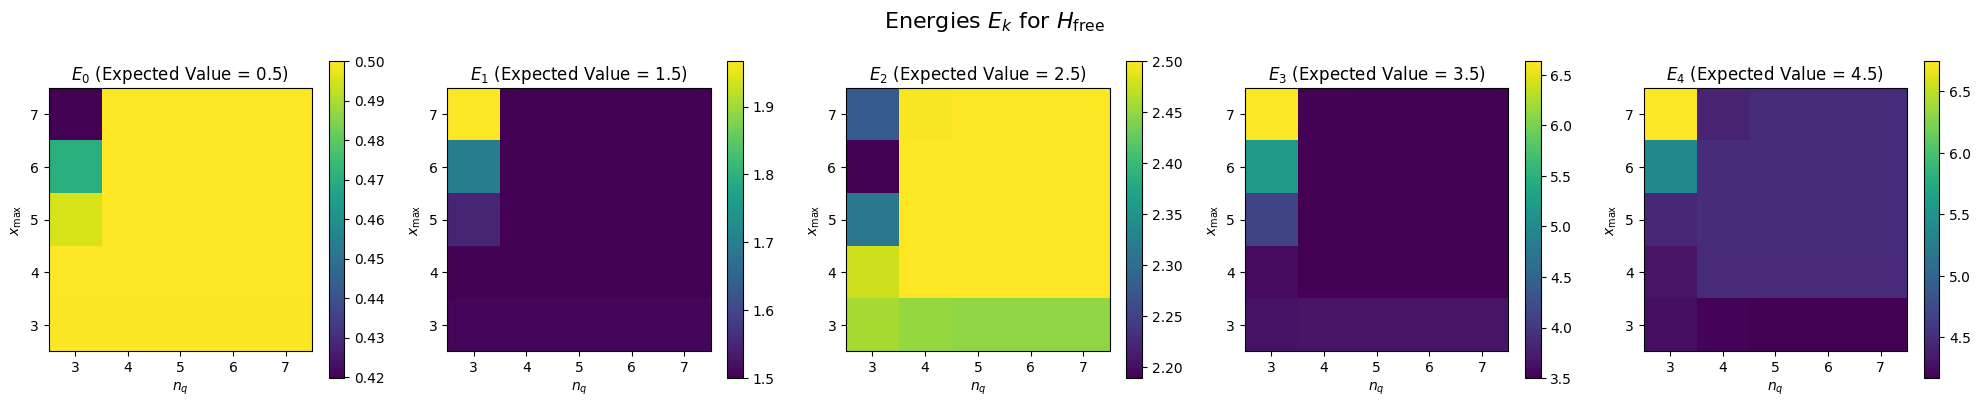

In [5]:
num_levels = 5
fig, axes = plt.subplots(1, num_levels, figsize=(4*num_levels, 4))
fig.suptitle(rf'Energies $E_{{k}}$ for $H_{{\text{{free}}}}$', fontsize=16)

for k in range(num_levels):
    energy_grid = np.array([[all_energies_free[i, j][k] for j in range(len(nq_vals))]
                            for i in range(len(xmax_vals))])

    im = axes[k].imshow(
        energy_grid,
        origin='lower',
        aspect='equal',
        cmap='viridis'
    )

    axes[k].set_xticks(np.arange(len(nq_vals)))
    axes[k].set_yticks(np.arange(len(xmax_vals)))
    axes[k].set_xticklabels(nq_vals)
    axes[k].set_yticklabels(xmax_vals)

    axes[k].set_xlabel(r'$n_q$')
    axes[k].set_ylabel(r'$x_{\max}$')
    axes[k].set_title(rf'$E_{{{k}}}$ (Expected Value = {(k+0.5):.1f})')

    fig.colorbar(im, ax=axes[k])

plt.tight_layout()
plt.show()

#### Plotting the lowest $5$ energies of $H_{\text{anh}}$ Hamiltonian for various $x_{\text{max}}$ and $n_q$ values

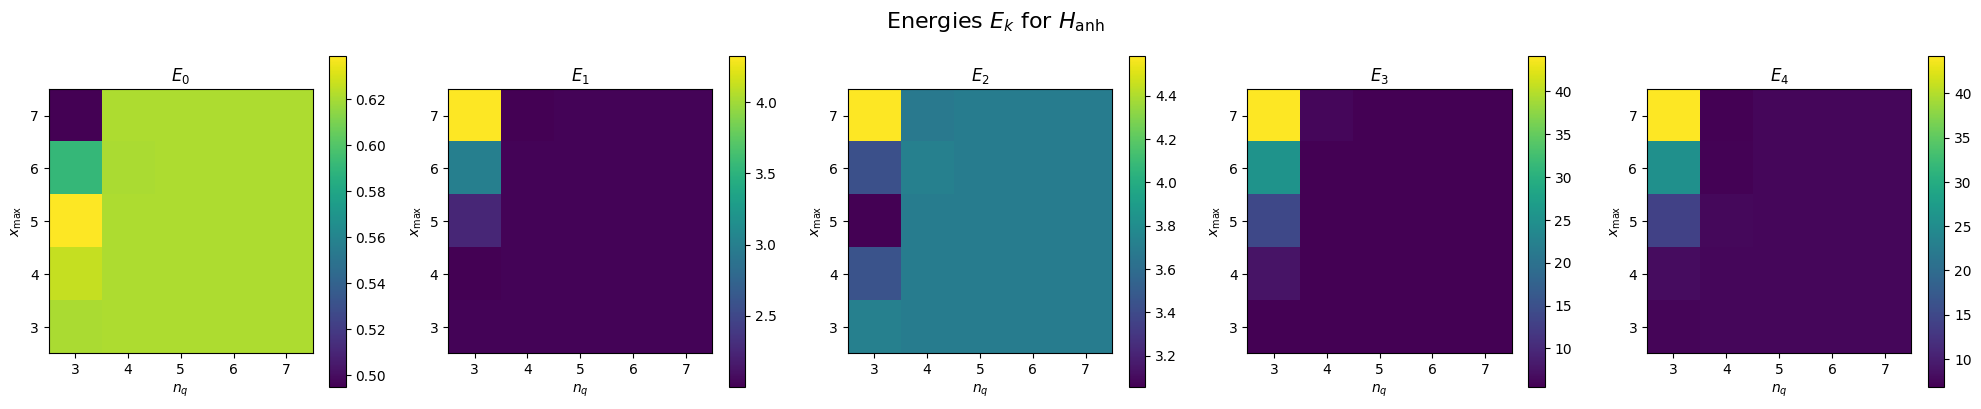

In [6]:
num_levels = 5
fig, axes = plt.subplots(1, num_levels, figsize=(4*num_levels, 4))
fig.suptitle(rf'Energies $E_{{k}}$ for $H_{{\text{{anh}}}}$', fontsize=16)

for k in range(num_levels):
    energy_grid = np.array([[all_energies_anh[i, j][k] for j in range(len(nq_vals))]
                            for i in range(len(xmax_vals))])

    im = axes[k].imshow(
        energy_grid,
        origin='lower',
        aspect='equal',
        cmap='viridis'
    )

    axes[k].set_xticks(np.arange(len(nq_vals)))
    axes[k].set_yticks(np.arange(len(xmax_vals)))
    axes[k].set_xticklabels(nq_vals)
    axes[k].set_yticklabels(xmax_vals)

    axes[k].set_xlabel(r'$n_q$')
    axes[k].set_ylabel(r'$x_{\max}$')
    axes[k].set_title(rf'$E_{{{k}}}$')

    fig.colorbar(im, ax=axes[k])

plt.tight_layout()
plt.show()

## Task 2: Wavefunction Convergence

#### Plotting the wavefunctions corresponding to the lowest $5$ energies of $H_{\text{free}}$ Hamiltonian for $x_{\text{max}}=5$ and various $n_q$ values

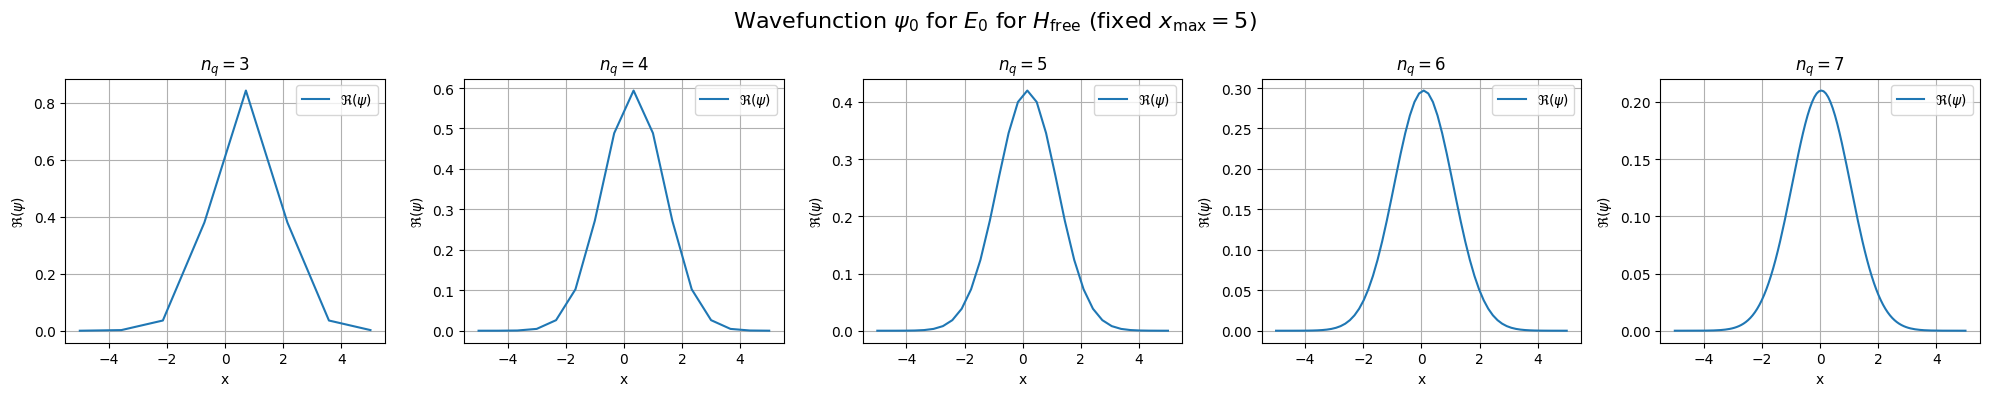

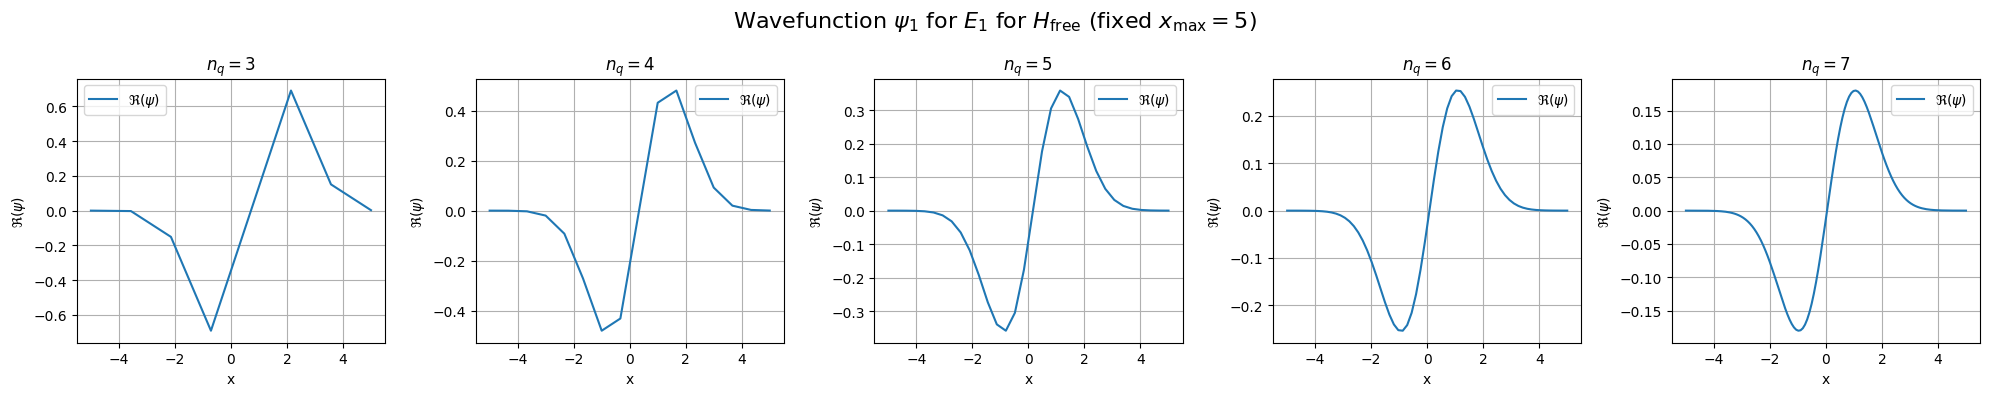

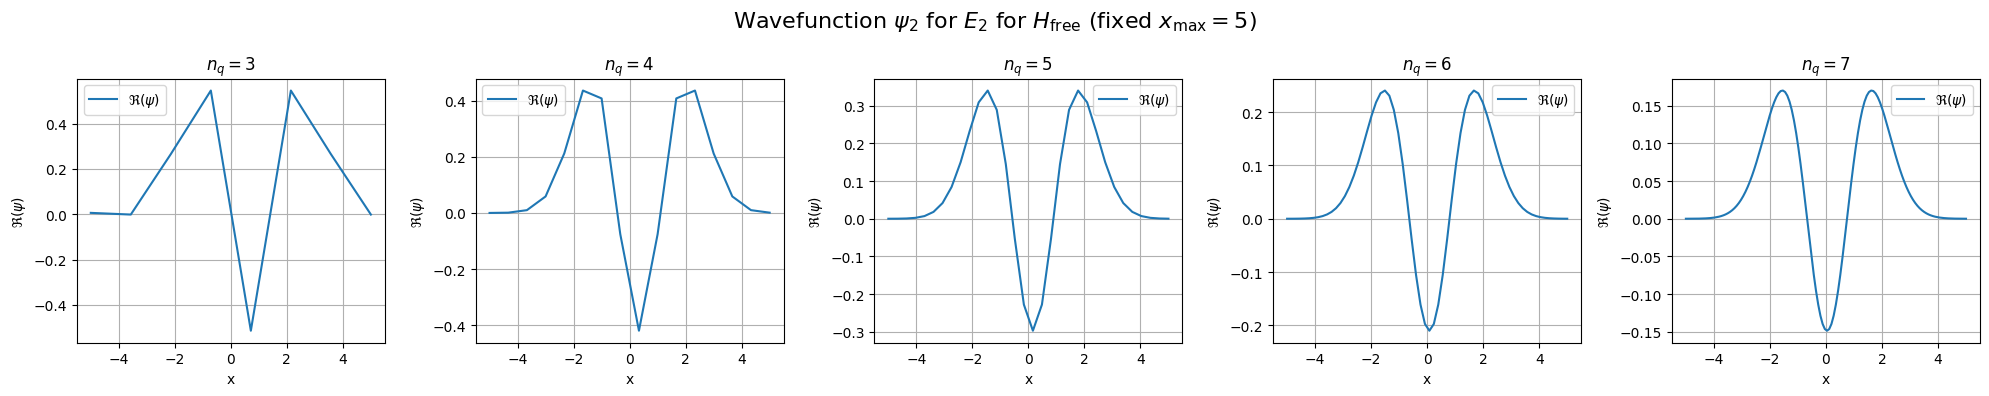

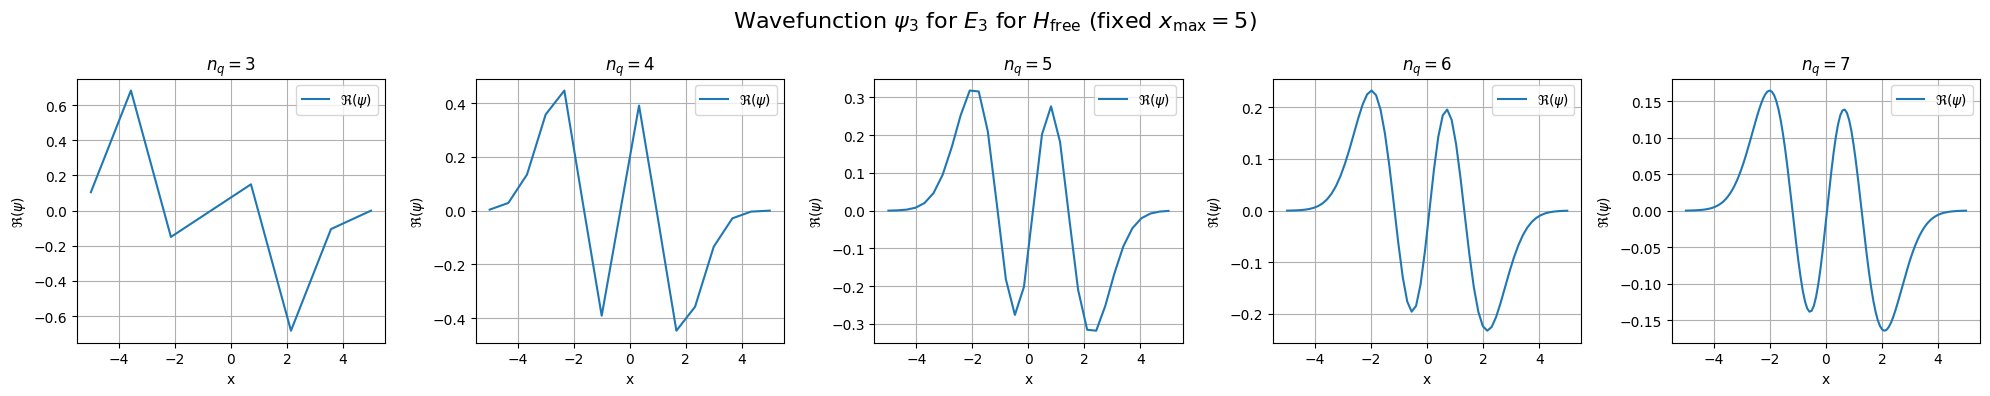

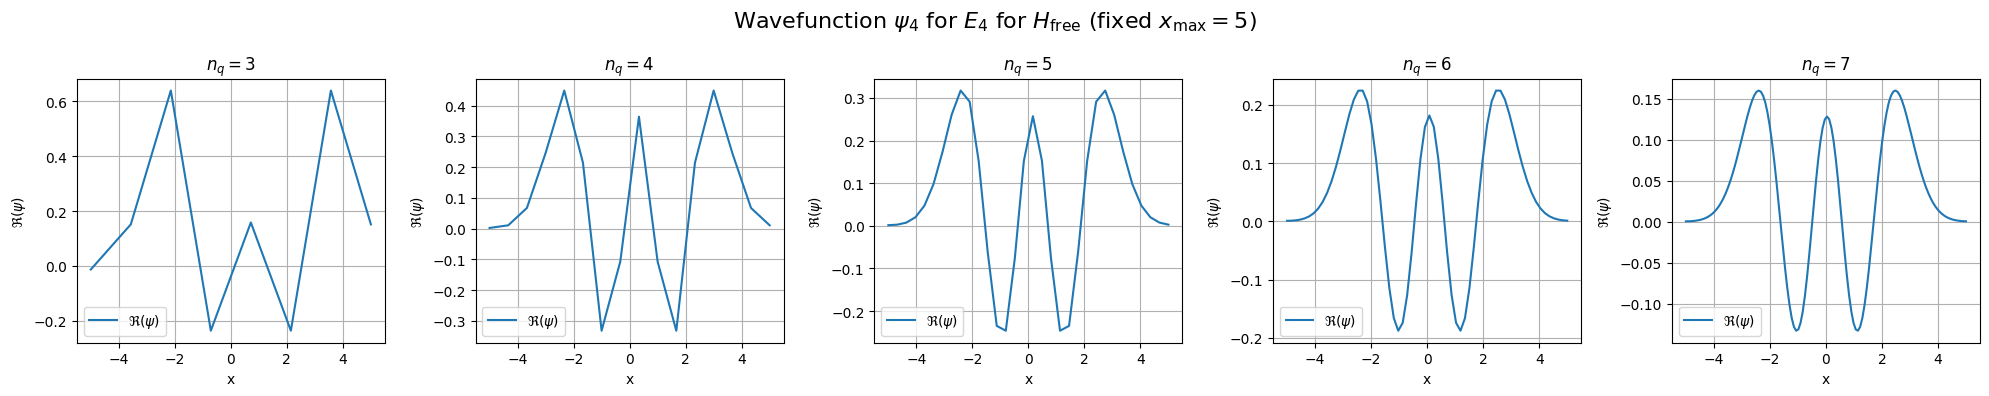

In [7]:
xmax_fixed = xmax_vals[2]
num_levels = 5

for k in range(num_levels):
    fig, axes = plt.subplots(1, len(nq_vals), figsize=(4 * len(nq_vals), 4))
    fig.suptitle(
        rf'Wavefunction $\psi_{{{k}}}$ for $E_{{{k}}}$ for $H_{{\text{{free}}}}$ (fixed $x_{{\max}}={xmax_fixed}$)',
        fontsize=16
    )

    for idx, nq in enumerate(nq_vals):
        wavefunc = all_wavefunctions_free[2, idx].copy()
        psi = np.real(wavefunc[:, k])
        x = np.linspace(-xmax_fixed, xmax_fixed, len(psi))

        psi /= np.linalg.norm(psi)
        if psi[np.argmax(np.abs(psi))] < 0:
            psi = -psi

        left_mass = np.sum(np.abs(psi[:len(psi)//2]))
        right_mass = np.sum(np.abs(psi[len(psi)//2:]))

        if k % 2 == 1:
            if psi[len(psi)//2 + 1] < psi[len(psi)//2 - 1]:
                psi = psi[::-1]
        else:
            if right_mass < left_mass:
                psi = psi[::-1]

        axes[idx].plot(x, psi, label=r'$\Re(\psi)$')
        axes[idx].set_title(rf'$n_q = {nq}$', fontsize=12)
        axes[idx].set_xlabel('x')
        axes[idx].set_ylabel(r'$\Re(\psi)$')
        axes[idx].grid(True)
        axes[idx].legend()

    plt.tight_layout()
    plt.show()


#### Plotting the wavefunctions corresponding to the lowest $5$ energies of $H_{\text{free}}$ Hamiltonian for $n_q=5$ and various $x_{\text{max}}$ values

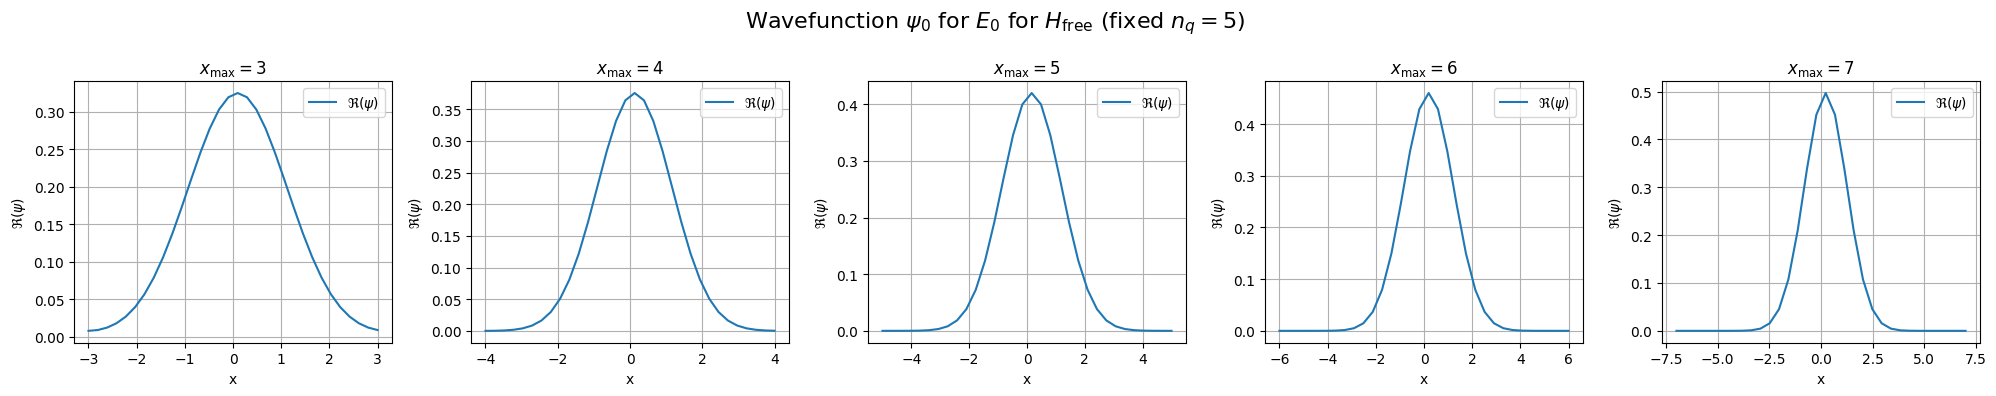

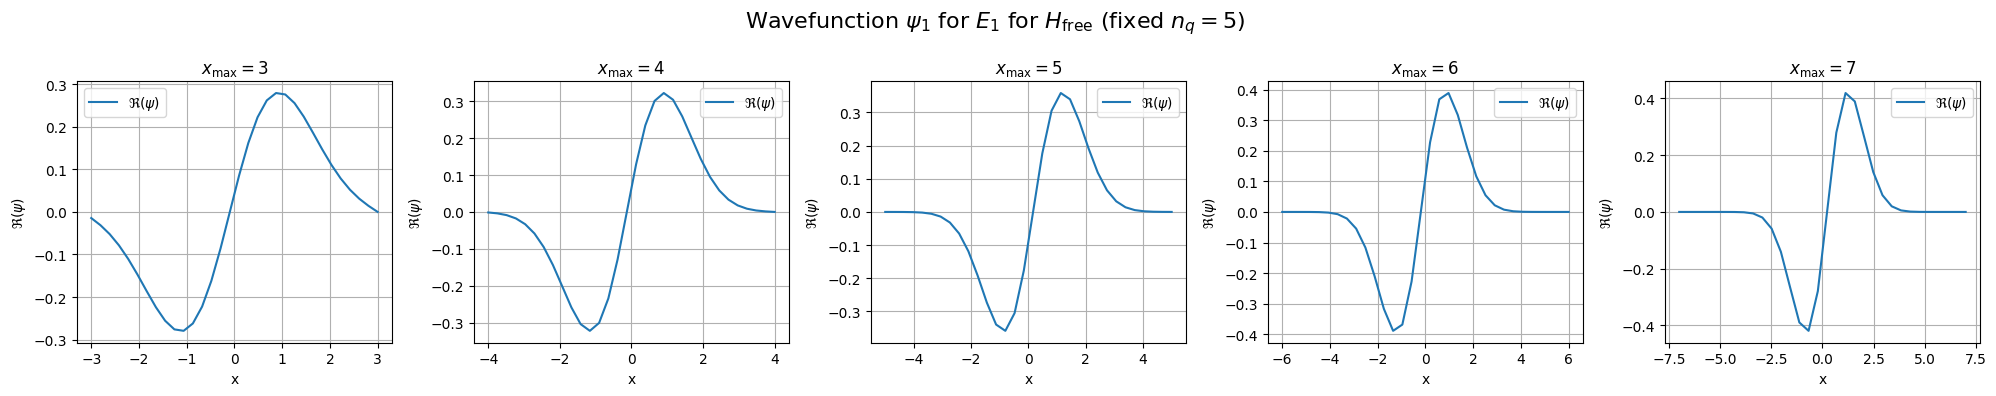

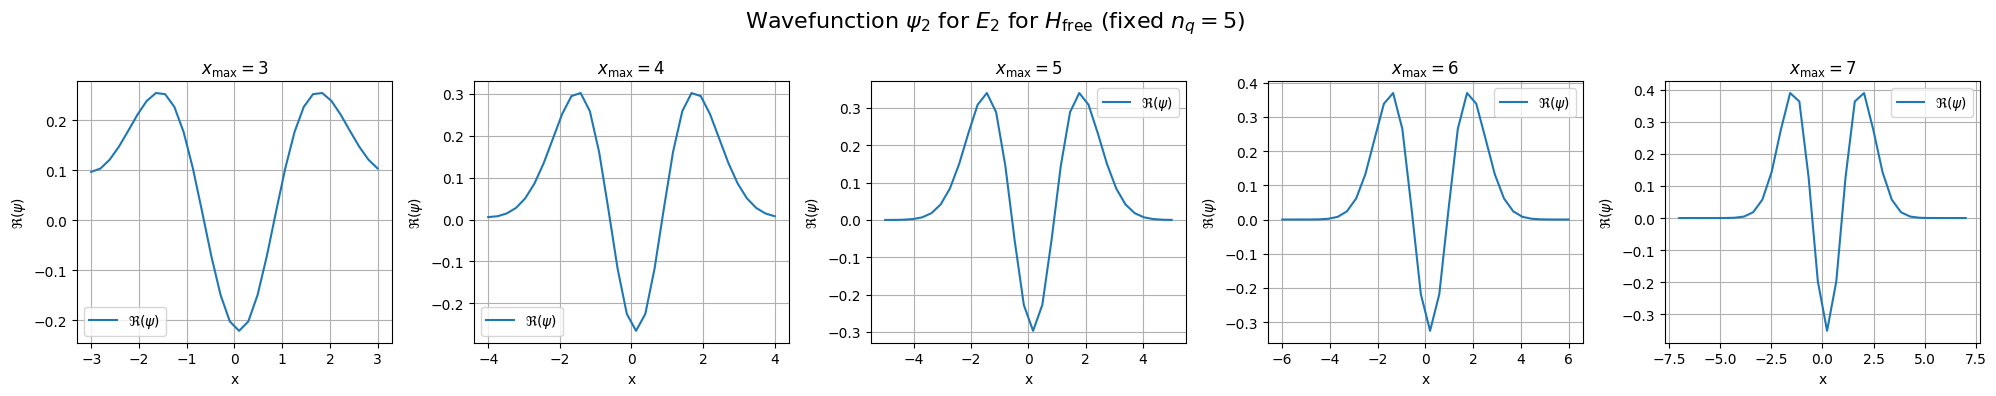

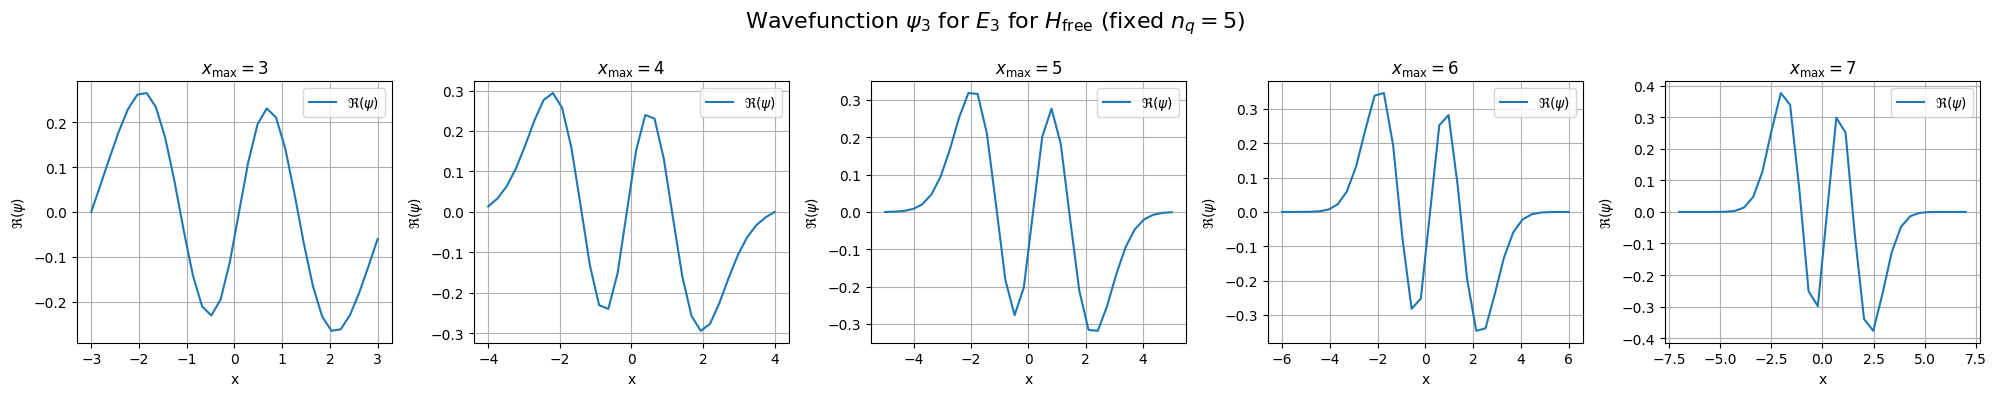

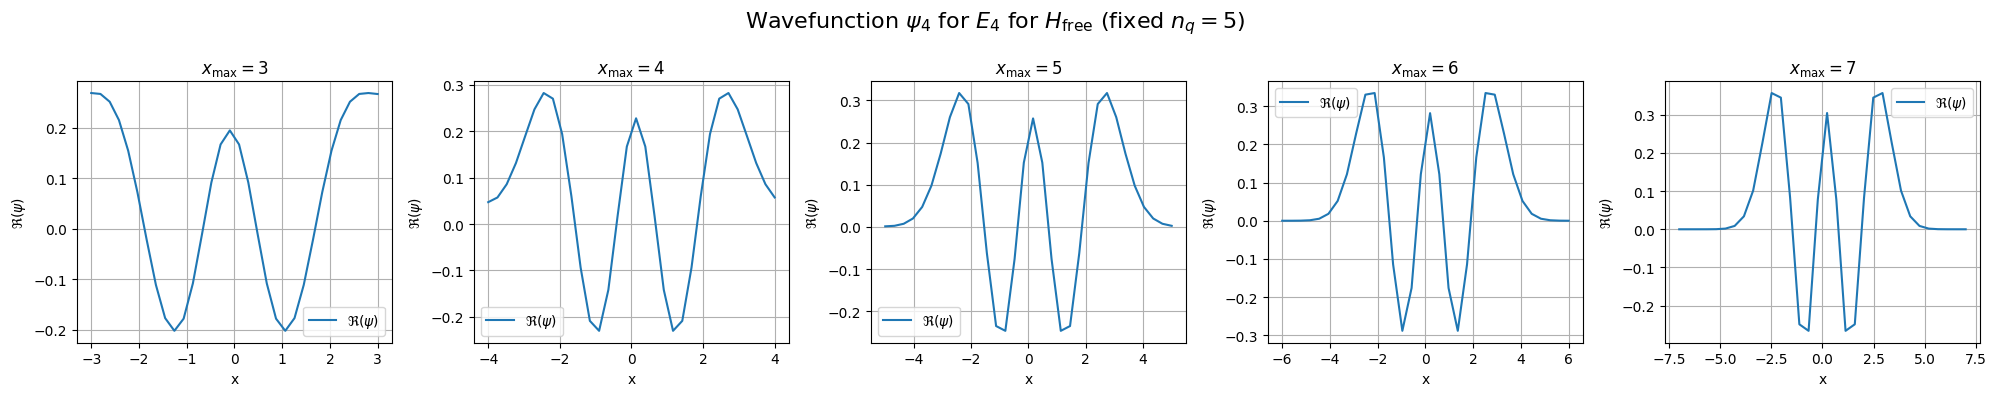

In [8]:

nq_fixed = nq_vals[2]
num_levels = 5

for k in range(num_levels):
    fig, axes = plt.subplots(1, len(xmax_vals), figsize=(4 * len(xmax_vals), 4))
    fig.suptitle(
        rf'Wavefunction $\psi_{{{k}}}$ for $E_{{{k}}}$ for $H_{{\text{{free}}}}$ (fixed $n_q={nq_fixed}$)',
        fontsize=16
    )

    for idx, xmax in enumerate(xmax_vals):
        wavefunc = all_wavefunctions_free[idx, 2].copy()
        psi = np.real(wavefunc[:, k])
        x = np.linspace(-xmax, xmax, len(psi))
        
        psi /= np.linalg.norm(psi)
        if psi[np.argmax(np.abs(psi))] < 0:
            psi = -psi

        left_mass = np.sum(np.abs(psi[:len(psi)//2]))
        right_mass = np.sum(np.abs(psi[len(psi)//2:]))

        if k % 2 == 1:
            if psi[len(psi)//2 + 1] < psi[len(psi)//2 - 1]:
                psi = psi[::-1]
        else:
            if right_mass < left_mass:
                psi = psi[::-1]

        axes[idx].plot(x, psi, label=r'$\Re(\psi)$')
        axes[idx].set_title(rf'$x_{{\max}} = {xmax}$', fontsize=12)
        axes[idx].set_xlabel('x')
        axes[idx].set_ylabel(r'$\Re(\psi)$')
        axes[idx].grid(True)
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

#### Plotting the wavefunctions corresponding to the lowest $5$ energies of $H_{\text{anh}}$ Hamiltonian for $x_{\text{max}}=5$ and various $n_q$ values

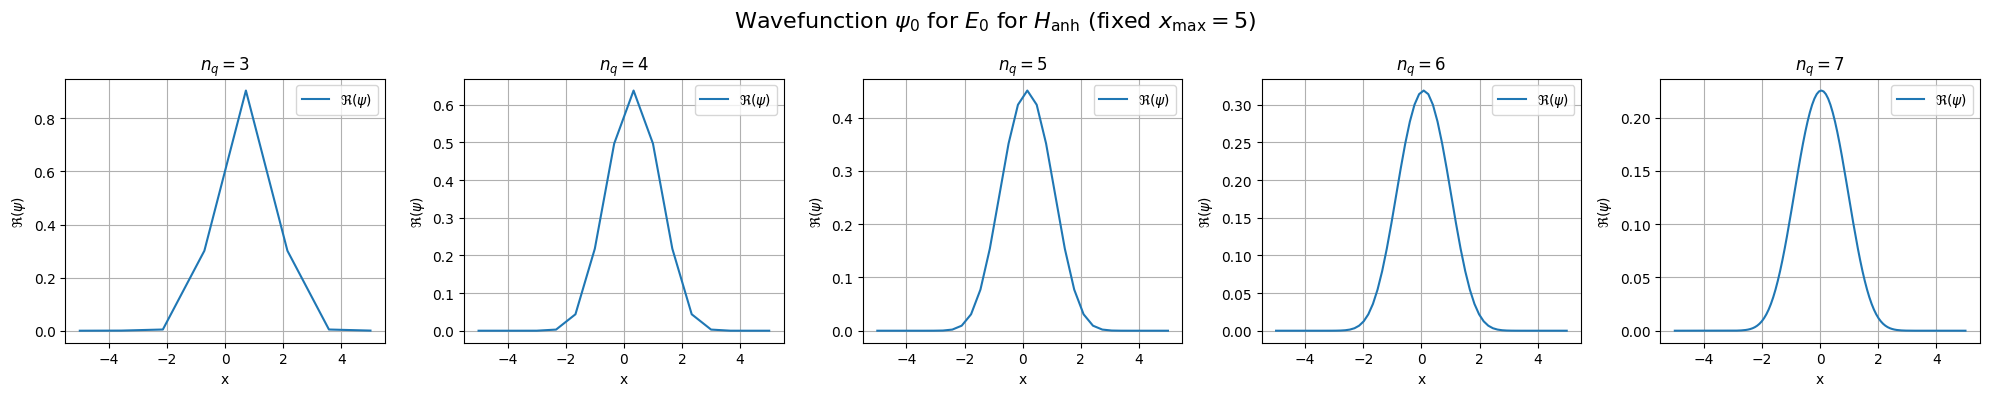

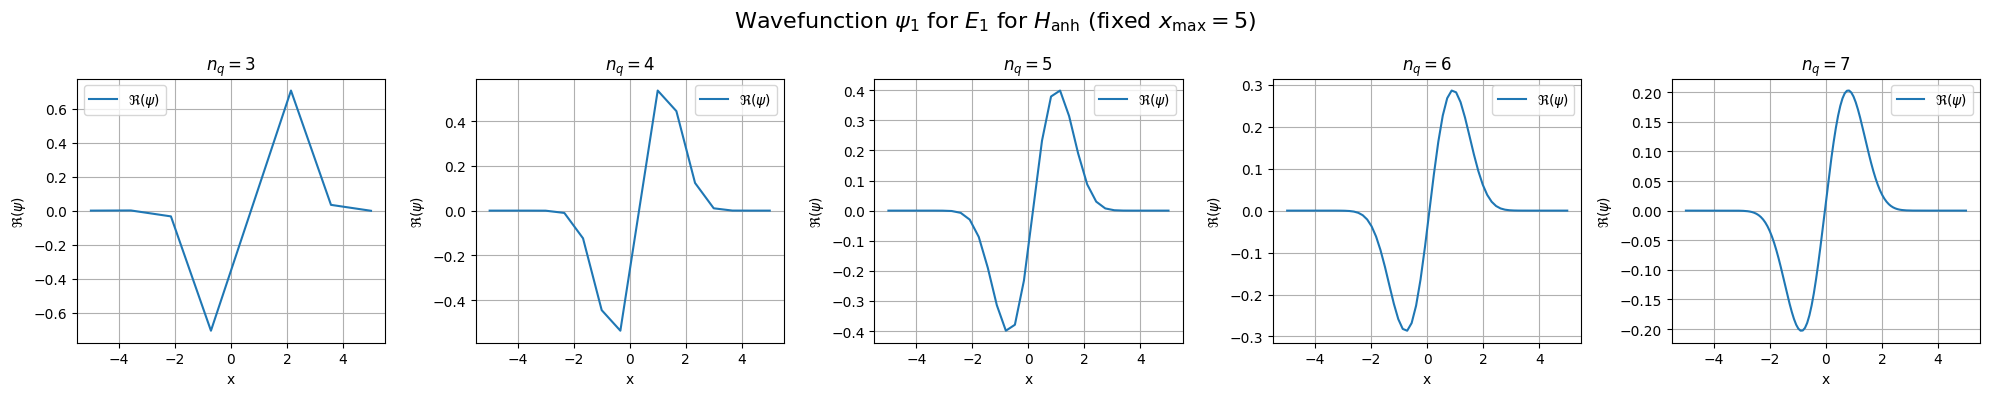

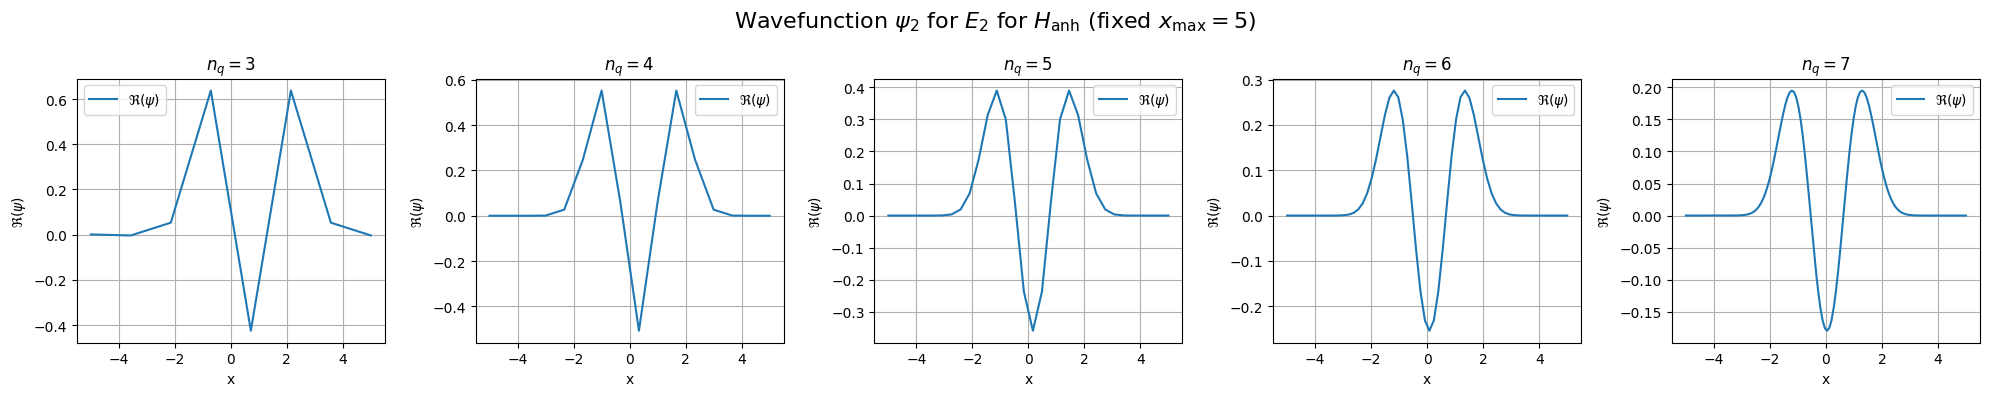

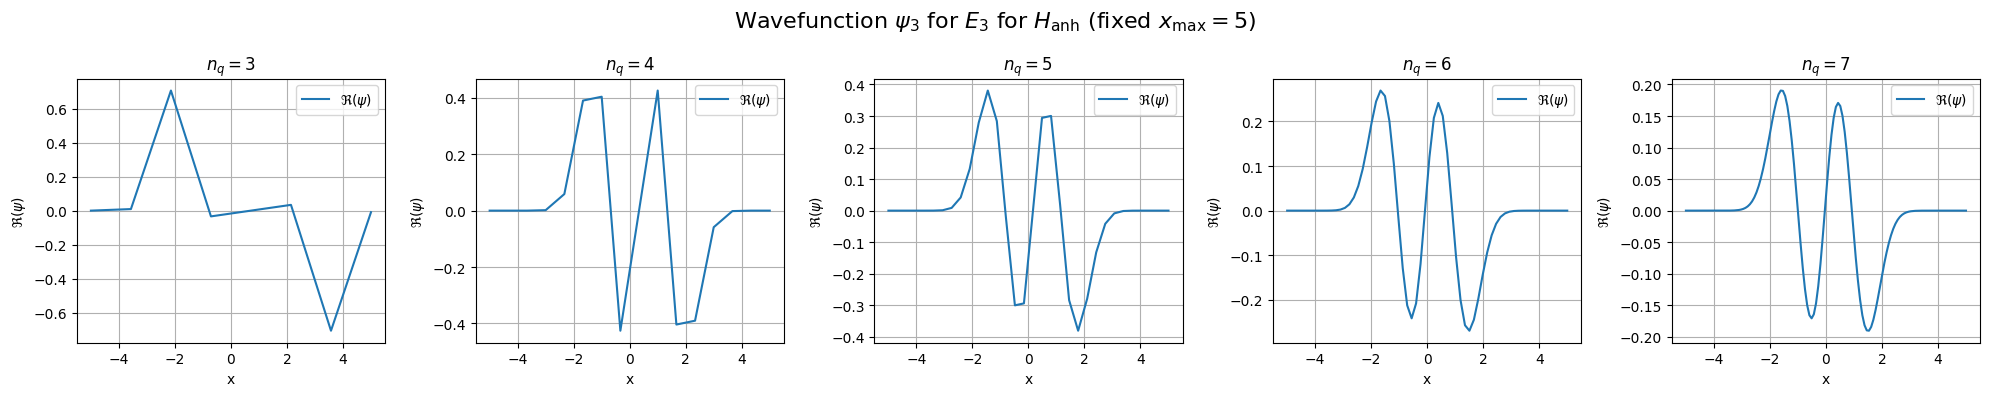

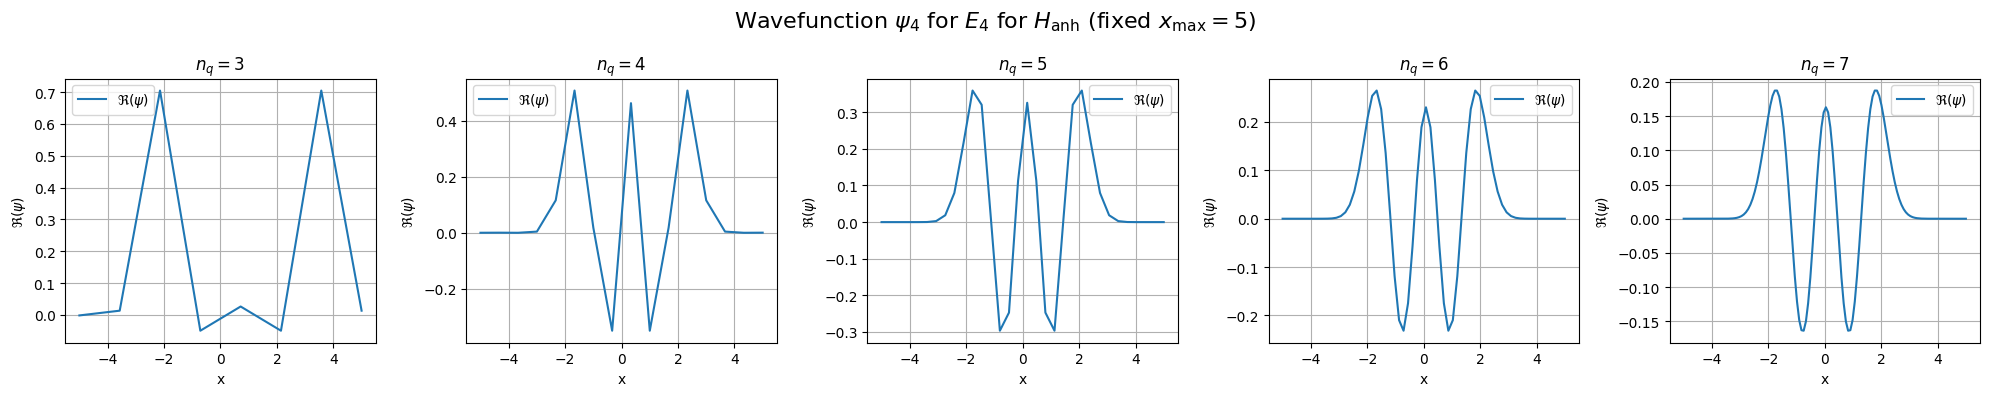

In [9]:
xmax_fixed = xmax_vals[2]
num_levels = 5

for k in range(num_levels):
    fig, axes = plt.subplots(1, len(nq_vals), figsize=(4 * len(nq_vals), 4))
    fig.suptitle(
        rf'Wavefunction $\psi_{{{k}}}$ for $E_{{{k}}}$ for $H_{{\text{{anh}}}}$ (fixed $x_{{\max}}={xmax_fixed}$)',
        fontsize=16
    )

    for idx, nq in enumerate(nq_vals):
        wavefunc = all_wavefunctions_anh[2, idx].copy()
        psi = np.real(wavefunc[:, k])
        x = np.linspace(-xmax_fixed, xmax_fixed, len(psi))

        psi /= np.linalg.norm(psi)
        if psi[np.argmax(np.abs(psi))] < 0:
            psi = -psi

        left_mass = np.sum(np.abs(psi[:len(psi)//2]))
        right_mass = np.sum(np.abs(psi[len(psi)//2:]))

        if k % 2 == 1:
            if psi[len(psi)//2 + 1] < psi[len(psi)//2 - 1]:
                psi = psi[::-1]
        else:
            if right_mass < left_mass:
                psi = psi[::-1]

        axes[idx].plot(x, psi, label=r'$\Re(\psi)$')
        axes[idx].set_title(rf'$n_q = {nq}$', fontsize=12)
        axes[idx].set_xlabel('x')
        axes[idx].set_ylabel(r'$\Re(\psi)$')
        axes[idx].grid(True)
        axes[idx].legend()

    plt.tight_layout()
    plt.show()


#### Plotting the wavefunctions corresponding to the lowest $5$ energies of $H_{\text{anh}}$ Hamiltonian for $n_q=5$ and various $x_{\text{max}}$ values

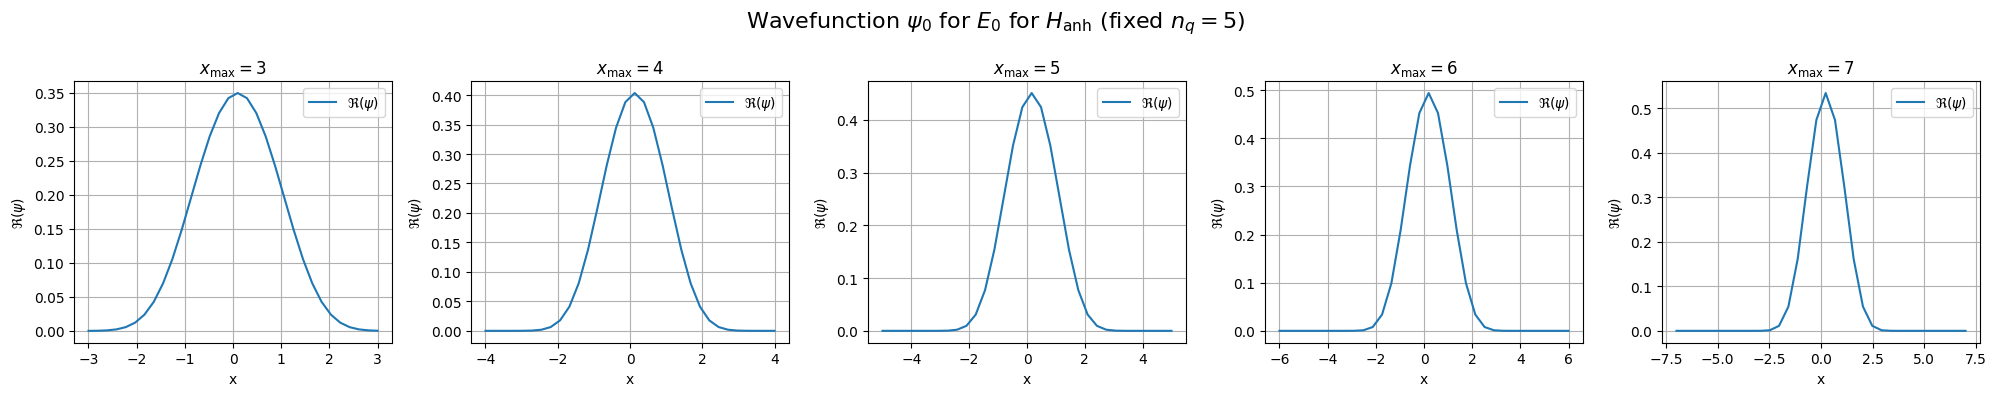

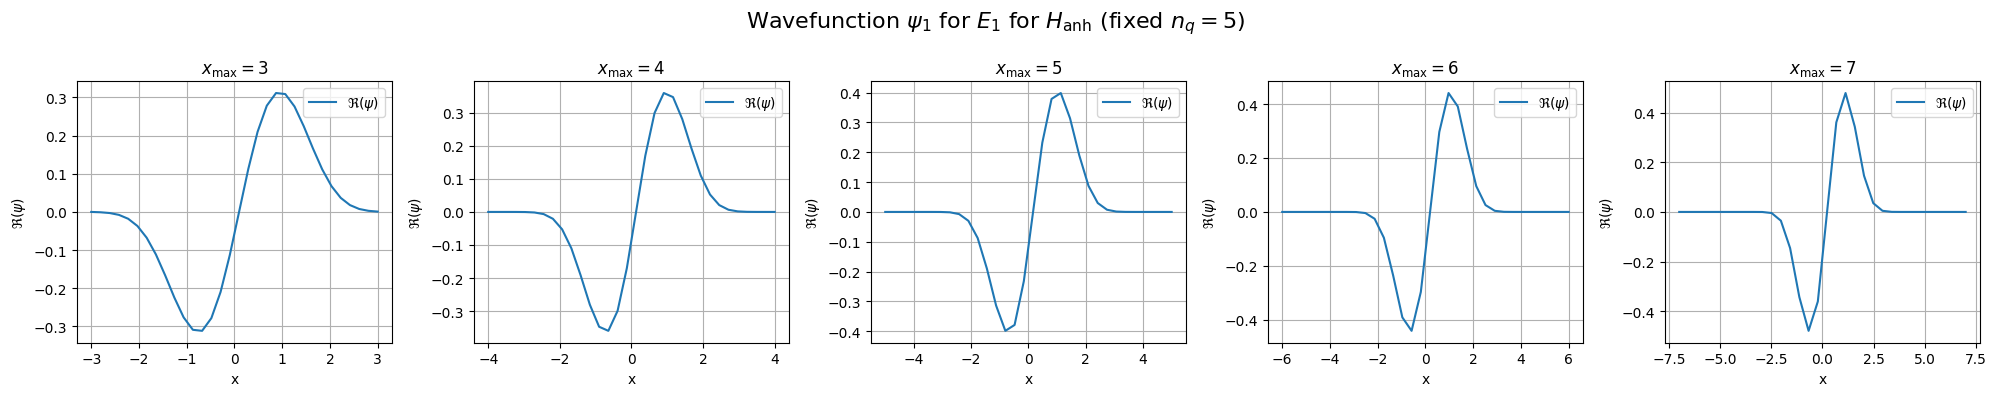

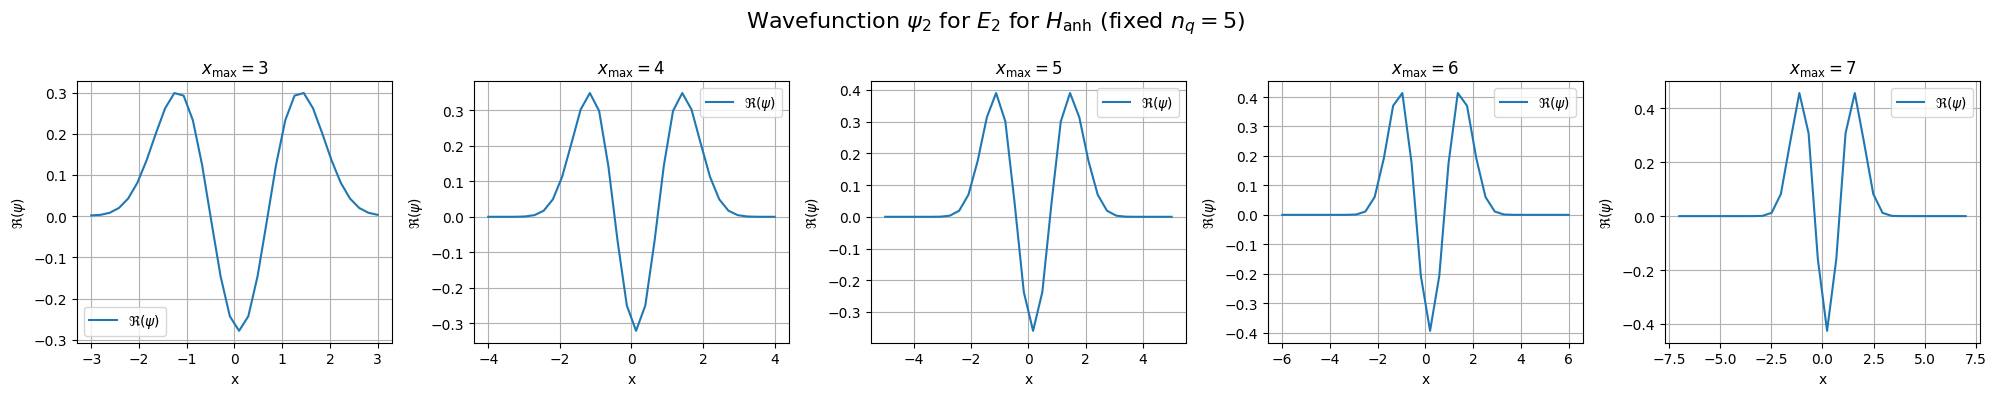

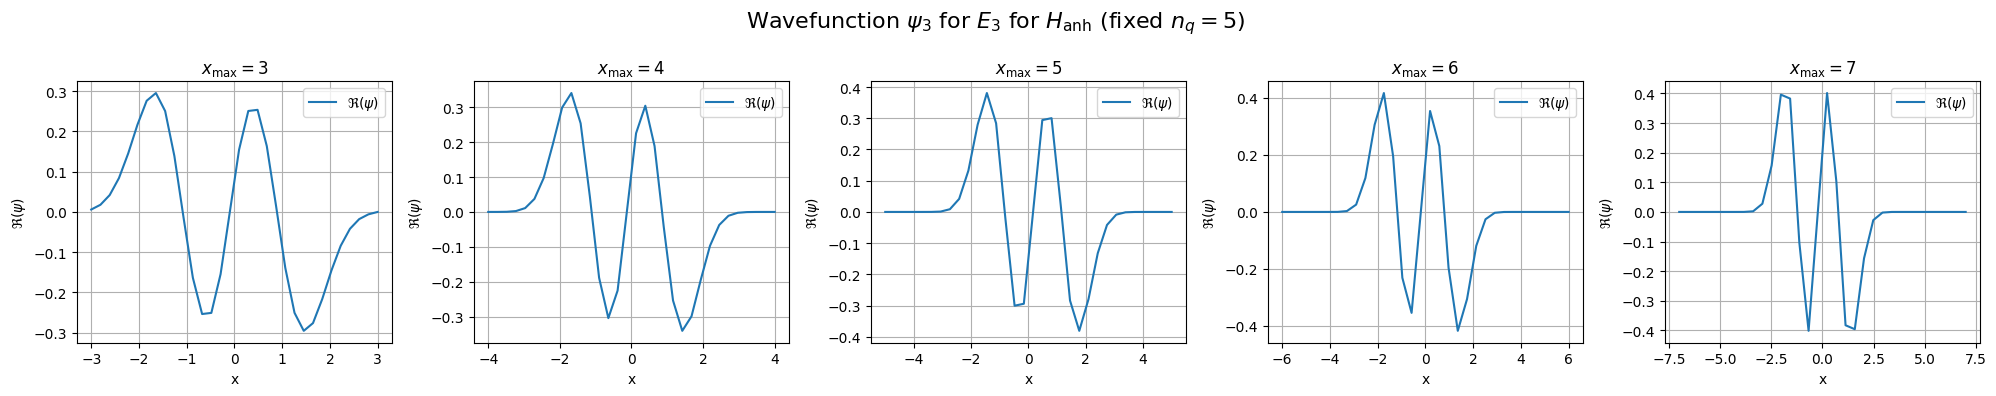

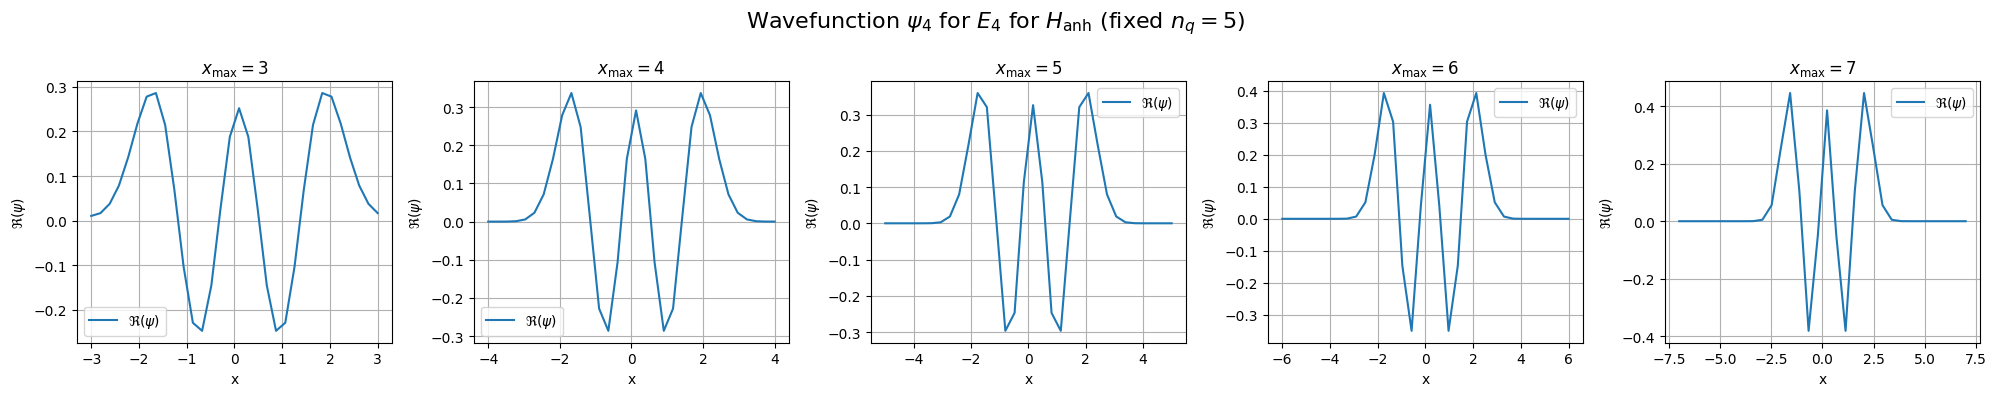

In [10]:

nq_fixed = nq_vals[2]
num_levels = 5

for k in range(num_levels):
    fig, axes = plt.subplots(1, len(xmax_vals), figsize=(4 * len(xmax_vals), 4))
    fig.suptitle(
        rf'Wavefunction $\psi_{{{k}}}$ for $E_{{{k}}}$ for $H_{{\text{{anh}}}}$ (fixed $n_q={nq_fixed}$)',
        fontsize=16
    )

    for idx, xmax in enumerate(xmax_vals):
        wavefunc = all_wavefunctions_anh[idx, 2].copy()
        psi = np.real(wavefunc[:, k])
        x = np.linspace(-xmax, xmax, len(psi))
        
        psi /= np.linalg.norm(psi)
        if psi[np.argmax(np.abs(psi))] < 0:
            psi = -psi

        left_mass = np.sum(np.abs(psi[:len(psi)//2]))
        right_mass = np.sum(np.abs(psi[len(psi)//2:]))

        if k % 2 == 1:
            if psi[len(psi)//2 + 1] < psi[len(psi)//2 - 1]:
                psi = psi[::-1]
        else:
            if right_mass < left_mass:
                psi = psi[::-1]

        axes[idx].plot(x, psi, label=r'$\Re(\psi)$')
        axes[idx].set_title(rf'$x_{{\max}} = {xmax}$', fontsize=12)
        axes[idx].set_xlabel('x')
        axes[idx].set_ylabel(r'$\Re(\psi)$')
        axes[idx].grid(True)
        axes[idx].legend()

    plt.tight_layout()
    plt.show()